---
title: Validation
authors:
  - name: Arman Oliazadeh
    affiliations:
      - id: umd
        institution: University of Georgia
        department: GEO
license: Apache 2.0
date: 2025‑08‑07
---

## The Principle of Validation

Validation in remote sensing is the process of independently assessing the accuracy of a data product. It is a very essential step that builds and quantifies the uncertainty of satellite-derived products.

### **Why Do We Validate?**

Satellites don't measure physical properties like temperature directly. They measure radiated energy, and we utilize complex models and algorithms to convert that energy measurement into a useful product, such as Sea Surface Temperature (SST). Validation is crucial for several reasons:
- **Quantify Accuracy:** Validation will provide a measure of success on how close the satellite product is to the ground-truth value (e.g., "accurate to within ±0.5°C").
- **Identify and Correct Bias:** This step can reveal various systematic errors where the satellite consistently measures too high or too low (spatial and temporal).
- **Understand Limitations:** Validation also helps define the conditions under which the product is reliable (e.g., "accurate in open water but less so near coastlines"). This would help other scientists or organizations to use the satellite data for climate modeling, weather forecasting, or policymaking.


### **Possible Methods for Validation:**

Validation involves comparing the satellite product to ground truth data or any source data.

- Point-to-Point Validation: This is the most common method and uses a high-quality in-situ measurement (like from a weather station, buoy, or Argo float for SST) and compares it to the value of the satellite pixel at the same location and time.
- Spatial Comparison: This method assesses how well the satellite captures spatial patterns. You compare the satellite image to a high-resolution map from another trusted source.
- Cross-Satellite Comparison: This technique compares three independent datasets (e.g., your new product, another satellite product, and ground truth data) to estimate the error of each one.

### **Statistical Tools:**

To quantify the comparison, there is a standard set of statistical metrics:

- **Bias**: The average difference between the satellite and ground truth data. It tells you if the product is systematically high or low.

            Bias = mean (Satellite - GroundTruth)
            
- **Root Mean Square Error (RMSE)**: This is the most important metric that measures the typical magnitude of the error, regardless of whether it is positive or negative. 

            RMSE = sqrt (mean ((Satellite - GroundTruth)²))
            
- **Standard Deviation**: This measures the consistency of the error and a low standard deviation means the error is predictable.

- **Correlation Coefficient (r or R²)**: This measures the degree to which the satellite data trends with the ground truth data. 

- **Regression Analysis for Cross-Validation**: This can be achieved by plotting the satellite data (y-axis) against the ground truth data (x-axis) and fitting a linear regression line. In a perfect world, this line would be y = 1x + 0 (the 1:1 line). The actual slope and intercept reveal systematic biases.


### **Steps in the Validation.pynb code**:

The proposed method developed a specific algorithm to derive SST from Landsat 8 data, which involves a cross-calibration with MODIS. The source code for the book is [released on GitHub repository](https://github.com/ProjectPythia/cookbook-template). The primary objective is to demonstrate that this specific method yields accurate results, particularly in the areas of study. In the validation script, there are several steps to consider: 
- Ground Truth Data: Systematically searches the iQuam dataset to find high-quality temperature measurements from Argo floats in Antarctica.
- Satellite Data: For each Argo measurement, it searches the Landsat STAC catalog to find a satellite image of the same location taken within ±12 hours, which is called a "matchup."
- Process: Processes the Landsat image using its algorithm to create an SST value and then directly compares this value to the Argo float's dataset.

The code implements the key statistical methods to assess the results of this comparison:
- *Data Compilation*: It first gathers all the matchups into a single pandas DataFrame called valids.
- *Bias and Mean Difference*: It calculates the mean values for both L8_SST and Argo_SST to get a general sense of the bias.
- *Scatter Plot and Regression*: It plots Argo SST on the x-axis (ground truth) and Landsat SST on the y-axis (satellite product) and performs an *Orthogonal Distance Regression (ODR)*, which is a robust form of linear regression, to find the best-fit line through the data points. It calculates and displays the R² value and RMSE to quantify the average error of their product. By doing this, the code provides a comprehensive and statistically sound validation of the new Landsat SST product, demonstrating its accuracy and reliability.

### Sample Validation Result

Put a code box!

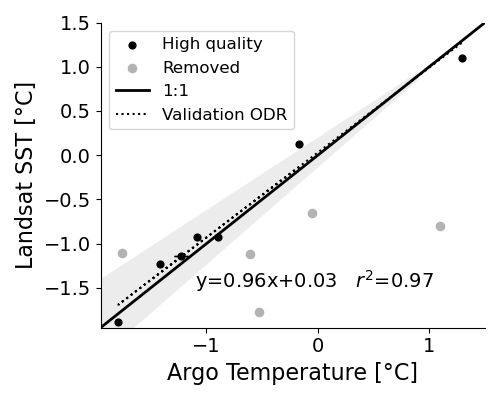

## **What is Next?**

A Multivariate Regression model was used in the current work for Sea Surface Temperature modeling. The regression-based models typically present some results based on the residual values of modeled vs observed values. There are a lot of metrics available for the interpretation of results and showing the accuracy of the model. It can be noted that there are other methods, including some Machine Learning classification methods, that can be used for SST analysis to provide a better understanding of the physical processes contributing to SST values. Moreover, spatial analysis can be done by these models, besides having some spatial error or deviation mapping for the regression models. 


### Advanced Methods for Deeper Understanding
While regression models are excellent for prediction, other advanced methods can provide a more nuanced understanding of the physical processes and spatial dynamics of SST.


**Machine Learning Classification Methods:**

Instead of predicting the exact SST value, Machine Learning (ML) classification models can be used to identify and categorize distinct oceanographic features or thermal regimes. An ML model, such as a Random Forest or Support Vector Machine (SVM), can be trained on satellite data to recognize the unique signatures of different water masses. For example, it can learn to distinguish between a warm coastal current, a cold upwelling zone, and a stable open-ocean gyre based on a combination of SST, salinity, and sea surface height data. This approach moves beyond a single temperature value to provide a qualitative understanding of the SST's concept. It can automatically map complex features that are crucial for understanding heat transport in marine ecosystems.

**Spatial Analysis and Error Mapping:**

Standard regression metrics provide a single accuracy number for the entire study area, but they don't reveal where the model performs well or poorly. Instead of averaging the residuals, they can be plotted at their geographic locations creating a spatial error map. Geostatistical tools can then be used to test for spatial autocorrelation, revealing if high or low errors are clustered together. This is critical for understanding model limitations, while an error map might show that a regression model performs very well in some regions but consistently fails near complex coastlines or river mouths. This insight is lost in non-spatial metrics and is vital for improving the model and correctly interpreting its outputs.

## Sample Visualization Mapping Result

We can produce higher spatial resolution error maps if we have more validation data. So, these current maps are just based on a 5° resolution grid and show that tropical regions have higher standard deviation and lower bias error values because of higher water vapor and dust aerosols. 


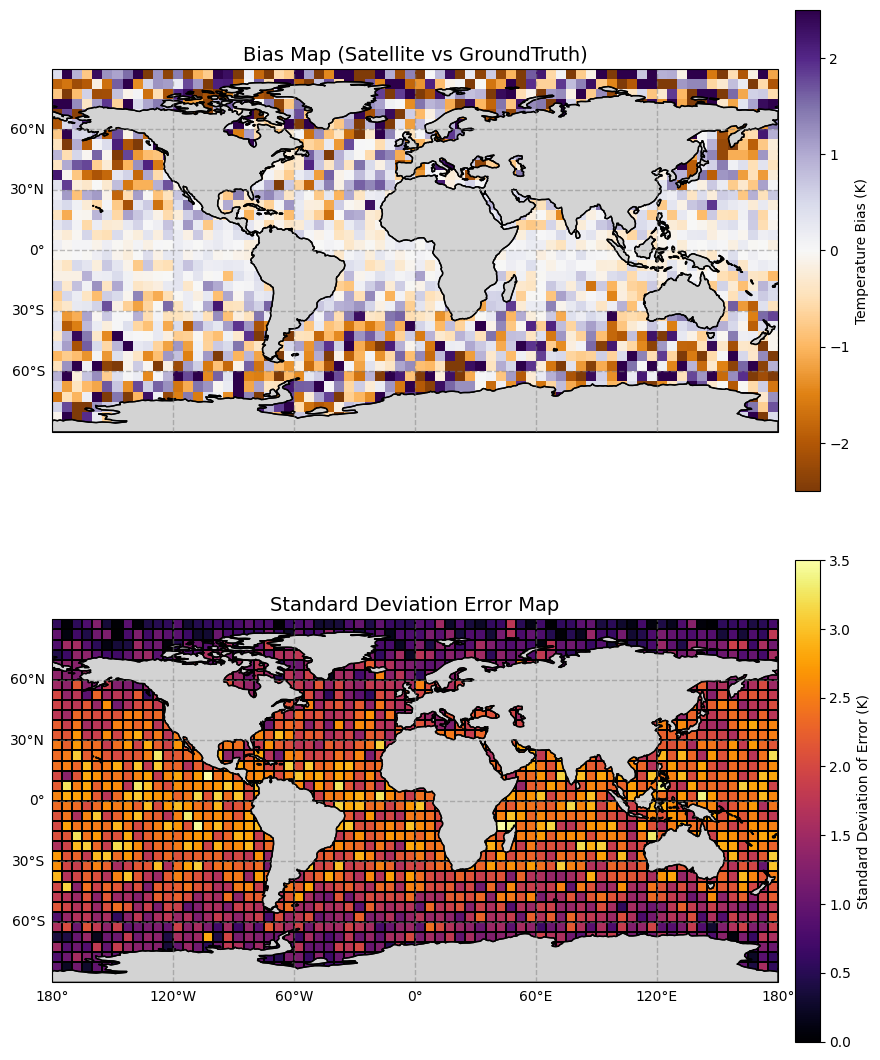

## Producing higher spatial resolution mapping results

### What is the common spatial resolution for SST error mapping?
The current 5° resolution grid mapping for spatial error analysis is somewhat coarse for model evaluation purposes. Therefore, there is a need to enhance the spatial evaluation in SST modeling.

### How to improve spatial resolution error mapping?
By having more validation data for validating the Landsat (30m) SST product, we would be able to apply more advanced models to improve spatial error mapping results. One method would be to train an ML model (e.g. Random Forest (RF), and Gradient Boosting Regressor (GBR)) algorithms on the validated pixels and then produce the error mapping with finer resolution to have an improved spatial mapping of the results. ([GitHub Link1](https://github.com/satellite-image-deep-learning/techniques), [GitHub Link2](https://github.com/stevenpawley/Pyspatialml)).

Having the data fused with higher spatial error mapping would enable us to better understand the reliability of our high-resolution SST map by moving beyond a single accuracy evaluation. It would also help reveal more precisely where the proposed model works well and where it fails. Here is a sample demonstration of our expected results for the next step. 

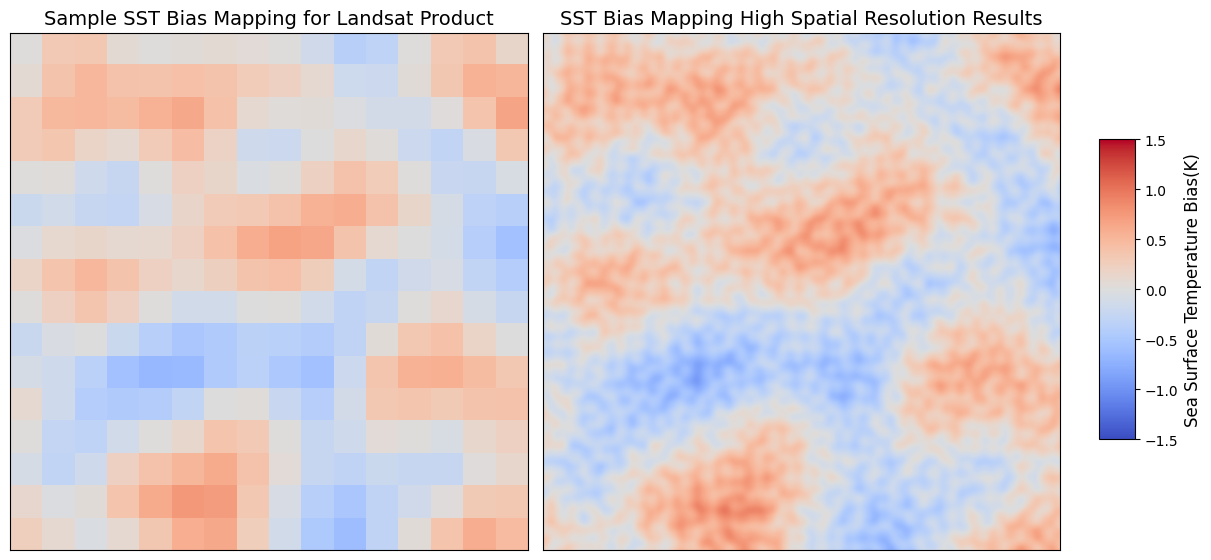